In [463]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
import keras
from tensorflow.keras.layers import *

In [464]:
prep_male = pd.read_excel('../datasets/prep_male.xlsx', index_col=0)
prep_female = pd.read_excel('../datasets/prep_female.xlsx', index_col=0)

In [465]:
data = pd.concat([prep_male, prep_female], axis= 'rows')
data.columns

Index(['성별', '생년', '검진년도', '검진 시 연령', '키', '체중', '허리둘레', 'BMI', '시력(좌)',
       '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '요단백', '헤모글로빈', '공복혈당',
       '총콜레스테롤', 'HDL', '중성지방', 'LDL', '혈청크레아티닌', '신사구체여과율', 'AST', 'ALT',
       'GTP', '폐결핵흉부질환'],
      dtype='object')

In [466]:
# 검진 시 연령, 허리둘레, BMI, 수축기혈압, 이완기혈압, 헤모글로빈, 공복혈당, 총콜레스테롤, HDL, LDL, 중성지방

In [467]:
data.reset_index(inplace= True)

In [468]:
data.rename(columns={'고유값':'일련번호'}, inplace=True)

In [469]:
data

,일련번호,성별,생년,검진년도,검진 시 연령,키,체중,허리둘레,BMI,시력(좌),...,총콜레스테롤,HDL,중성지방,LDL,혈청크레아티닌,신사구체여과율,AST,ALT,GTP,폐결핵흉부질환
0,M0,M,1977,2010,34,174.0,64.0,72.0,21.1,1.2,...,194.0,47.0,84.0,130.0,1.2,171,18,13.0,12,정상
1,M0,M,1977,2011,35,175.0,68.0,79.0,22.2,1.0,...,182.0,52.0,90.0,111.0,1.2,169,18,11.0,16,정상
2,M0,M,1977,2012,36,175.0,68.0,76.0,22.2,0.7,...,176.0,38.0,188.0,100.0,1.1,80,21,15.0,17,정상
3,M0,M,1977,2013,37,175.0,81.0,92.0,26.4,0.7,...,203.0,42.0,135.0,134.0,1.1,80,16,17.0,18,정상
4,M0,M,1977,2014,38,175.0,86.0,96.0,28.1,0.6,...,205.0,45.0,141.0,132.0,0.9,100,19,28.0,23,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,F30,F,1971,2015,45,154.0,54.0,75.0,22.8,0.9,...,213.0,64.0,76.0,133.0,0.9,72,21,9.0,16,정상
1064,F30,F,1971,2016,46,154.0,55.0,70.0,23.2,1.0,...,225.0,61.0,73.0,149.0,0.9,72,20,13.0,14,정상
1065,F30,F,1971,2017,47,153.6,54.2,69.0,23.0,1.2,...,197.0,60.0,86.0,120.0,0.9,71,18,10.0,11,정상
1066,F30,F,1971,2018,48,153.2,54.7,75.8,23.3,0.9,...,NaN,NaN,NaN,NaN,0.9,71,19,13.0,13,정상


In [470]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 28 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   일련번호     1068 non-null   object 
 1   성별       1068 non-null   object 
 2   생년       1068 non-null   int64  
 3   검진년도     1068 non-null   int64  
 4   검진 시 연령  1068 non-null   int64  
 5   키        1068 non-null   float64
 6   체중       1068 non-null   float64
 7   허리둘레     1067 non-null   float64
 8   BMI      1068 non-null   float64
 9   시력(좌)    1068 non-null   float64
 10  시력(우)    1068 non-null   float64
 11  청력(좌)    1068 non-null   object 
 12  청력(우)    1068 non-null   object 
 13  수축기혈압    1068 non-null   int64  
 14  이완기혈압    1068 non-null   int64  
 15  요단백      1066 non-null   object 
 16  헤모글로빈    1068 non-null   float64
 17  공복혈당     1068 non-null   int64  
 18  총콜레스테롤   902 non-null    float64
 19  HDL      900 non-null    float64
 20  중성지방     900 non-null    float64
 21  LDL      878 n

In [196]:
data.columns

Index(['일련번호', '성별', '생년', '검진년도', '검진 시 연령', '키', '체중', '허리둘레', 'BMI',
       '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '요단백', '헤모글로빈',
       '공복혈당', '총콜레스테롤', 'HDL', '중성지방', 'LDL', '혈청크레아티닌', '신사구체여과율', 'AST',
       'ALT', 'GTP', '폐결핵흉부질환'],
      dtype='object')

In [391]:
data.dropna(axis=0, inplace= True)

In [392]:
from sklearn.preprocessing import MinMaxScaler

In [416]:
# MinMaxScaling 실행
minmaxscaler = MinMaxScaler()
scaled_data = minmaxscaler.fit_transform(data[['검진 시 연령', '수축기혈압', '이완기혈압',
                                               'BMI', '공복혈당','키', '체중', '허리둘레',
                                               '헤모글로빈', '총콜레스테롤', 'HDL', '중성지방', 'LDL']])
print(scaled_data[:6])
print(scaled_data.shape)

[[0.29545455 0.5        0.46774194 0.203125   0.19496855 0.72972973
  0.30327869 0.24916944 0.74117647 0.3875     0.28888889 0.14386792
  0.0920354 ]
 [0.31818182 0.375      0.30645161 0.26041667 0.11320755 0.75675676
  0.3579235  0.3654485  0.78823529 0.3375     0.34444444 0.15801887
  0.07522124]
 [0.34090909 0.375      0.30645161 0.26041667 0.09433962 0.75675676
  0.3579235  0.31561462 0.70588235 0.3125     0.18888889 0.38915094
  0.06548673]
 [0.36363636 0.55       0.4516129  0.47916667 0.19496855 0.75675676
  0.53551913 0.58139535 0.65882353 0.425      0.23333333 0.26415094
  0.09557522]
 [0.38636364 0.5875     0.51612903 0.56770833 0.22012579 0.75675676
  0.60382514 0.64784053 0.71764706 0.43333333 0.26666667 0.27830189
  0.09380531]
 [0.40909091 0.6        0.61290323 0.46354167 0.11320755 0.78378378
  0.53551913 0.54817276 0.76470588 0.3625     0.24444444 0.41037736
  0.07079646]]
(868, 13)


In [483]:
sequence_X = []
sequence_Y = []
for i in range(0, len(scaled_data) - 5):
    _x = scaled_data[i : i + 5]
    _y = scaled_data[i + 5][1]
    sequence_X.append(_x)
    sequence_Y.append(_y)

In [484]:
sequence_X = np.array(sequence_X)
sequence_Y = np.array(sequence_Y)
print(sequence_X.shape)
print(sequence_Y.shape)

(863, 5, 13)
(863,)


In [485]:
from sklearn.model_selection import train_test_split

In [486]:
X_train, X_test, Y_train, Y_test = train_test_split(sequence_X, sequence_Y, test_size = 0.2, random_state = 77)
X_train.shape, X_test.shape, Y_train.shape

((690, 5, 13), (173, 5, 13), (690,))

In [487]:
model = Sequential()
model.add(LSTM(256, input_shape= (X_train.shape[1], X_train.shape[2]), activation= 'tanh', return_sequences=True))
model.add(LSTM(128, activation= 'tanh', return_sequences=True))
model.add(LSTM(64, activation= 'tanh', return_sequences=True))
model.add(LSTM(64, activation= 'tanh', return_sequences=True))
model.add(LSTM(32, activation= 'tanh'))
model.add(Flatten())
model.add(Dense(32, activation= 'relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_209 (LSTM)              (None, 5, 256)            276480    
_________________________________________________________________
lstm_210 (LSTM)              (None, 5, 128)            197120    
_________________________________________________________________
lstm_211 (LSTM)              (None, 5, 64)             49408     
_________________________________________________________________
lstm_212 (LSTM)              (None, 5, 64)             33024     
_________________________________________________________________
lstm_213 (LSTM)              (None, 32)                12416     
_________________________________________________________________
flatten_42 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_58 (Dense)             (None, 32)              

In [488]:
opt = Adam(lr = 0.0001)  
model.compile(opt, loss= 'mse', metrics=['accuracy'])
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience= 7)

In [489]:
fit_hist = model.fit(X_train, Y_train, epochs = 500, validation_data= (X_test, Y_test), shuffle= False, callbacks= [early_stop])

Train on 690 samples, validate on 173 samples
Epoch 1/500
690/690 [==============================] - 12s 17ms/sample - loss: 0.1452 - accuracy: 0.0087 - val_loss: 0.1221 - val_accuracy: 0.0173
Epoch 2/500
690/690 [==============================] - 0s 591us/sample - loss: 0.1140 - accuracy: 0.0087 - val_loss: 0.0767 - val_accuracy: 0.0173
Epoch 3/500
690/690 [==============================] - 0s 648us/sample - loss: 0.0506 - accuracy: 0.0087 - val_loss: 0.0183 - val_accuracy: 0.0173
Epoch 4/500
690/690 [==============================] - 0s 569us/sample - loss: 0.0243 - accuracy: 0.0087 - val_loss: 0.0173 - val_accuracy: 0.0173
Epoch 5/500
690/690 [==============================] - 0s 554us/sample - loss: 0.0231 - accuracy: 0.0087 - val_loss: 0.0175 - val_accuracy: 0.0173
Epoch 6/500
690/690 [==============================] - 0s 562us/sample - loss: 0.0227 - accuracy: 0.0087 - val_loss: 0.0172 - val_accuracy: 0.0173
Epoch 7/500
690/690 [==============================] - 0s 556us/sample -

690/690 [==============================] - 0s 549us/sample - loss: 0.0218 - accuracy: 0.0087 - val_loss: 0.0164 - val_accuracy: 0.0173
Epoch 57/500
690/690 [==============================] - 0s 570us/sample - loss: 0.0218 - accuracy: 0.0087 - val_loss: 0.0164 - val_accuracy: 0.0173
Epoch 58/500
690/690 [==============================] - 0s 556us/sample - loss: 0.0218 - accuracy: 0.0087 - val_loss: 0.0164 - val_accuracy: 0.0173
Epoch 59/500
690/690 [==============================] - 0s 552us/sample - loss: 0.0217 - accuracy: 0.0087 - val_loss: 0.0164 - val_accuracy: 0.0173
Epoch 60/500
690/690 [==============================] - 0s 568us/sample - loss: 0.0217 - accuracy: 0.0087 - val_loss: 0.0164 - val_accuracy: 0.0173
Epoch 61/500
690/690 [==============================] - 0s 571us/sample - loss: 0.0217 - accuracy: 0.0087 - val_loss: 0.0164 - val_accuracy: 0.0173
Epoch 62/500
690/690 [==============================] - 0s 587us/sample - loss: 0.0217 - accuracy: 0.0087 - val_loss: 0.0163 

690/690 [==============================] - 0s 545us/sample - loss: 0.0211 - accuracy: 0.0101 - val_loss: 0.0157 - val_accuracy: 0.0173
Epoch 112/500
690/690 [==============================] - 0s 572us/sample - loss: 0.0211 - accuracy: 0.0101 - val_loss: 0.0157 - val_accuracy: 0.0173
Epoch 113/500
690/690 [==============================] - 0s 571us/sample - loss: 0.0210 - accuracy: 0.0101 - val_loss: 0.0157 - val_accuracy: 0.0173
Epoch 114/500
690/690 [==============================] - 0s 571us/sample - loss: 0.0210 - accuracy: 0.0101 - val_loss: 0.0157 - val_accuracy: 0.0173
Epoch 115/500
690/690 [==============================] - 0s 567us/sample - loss: 0.0210 - accuracy: 0.0101 - val_loss: 0.0157 - val_accuracy: 0.0173
Epoch 116/500
690/690 [==============================] - 0s 567us/sample - loss: 0.0209 - accuracy: 0.0101 - val_loss: 0.0157 - val_accuracy: 0.0173
Epoch 117/500
690/690 [==============================] - 0s 572us/sample - loss: 0.0209 - accuracy: 0.0101 - val_loss: 0

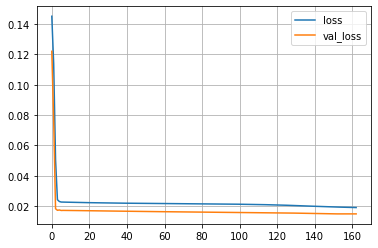

In [490]:
plt.plot(fit_hist.history['loss'], label= 'loss')
plt.plot(fit_hist.history['val_loss'], label= 'val_loss')
plt.legend()
plt.grid()
plt.show()

In [491]:
predict = model.predict(X_test)

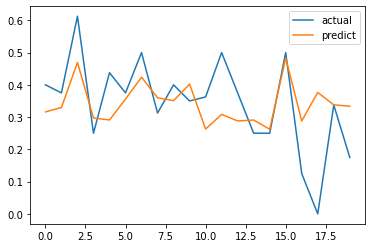

In [492]:
plt.plot(Y_test[-20:], label= 'actual')
plt.plot(predict[-20:], label= 'predict')
plt.legend()
plt.show()